In [120]:
import numpy as np
import pandas as pd
import ipaddress
from sklearn.preprocessing import LabelEncoder
from urllib.parse import urlparse
import pyarrow
from ipaddress import *
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf
from pyspark.sql.types import *
import re
import warnings
warnings.filterwarnings("ignore")
sns.set_style(style='white') 
import tldextract


In [121]:
def rq(url):
    url=url.strip()
    url=url.strip('\'')
    url=url.strip('\"')
    url=url.strip('-')
    return str(url)

In [122]:
data=pd.read_csv('data_urls.csv')
data=data.drop_duplicates()

In [123]:

def domain(url):
    d=tldextract.extract(url)
    if d.domain == "":
        if d.subdomain:
            p=urlparse(d.subdomain)
            d=tldextract.extract(p.path)
            return d.domain
        return None
    return d.domain

def rep(url):
    if re.match(r"^https://",url):
        url=url.replace(r"^https://","")
        if re.match(r"^www",url):
            url = url.replace(r"^www","")
            return 1
        return 2
        
    if re.match(r"http://",url):
        url=url.replace(r"http://","")
        if re.match(r"www",url):
            url = url.replace(r"www","")
            return 3
        return 4
    if re.match(r"www",url):
            url = url.replace("",r"www")
            return 5
    if re.match(r'^[^a-zA-Z0-9]*www\.',url):
        url=url.replace(r'^[^a-zA-Z0-9]*www\.',"")
        return 6
    return 7

def subdomain(url):
    if re.match(r"https://",url):
        url=url.replace(r"https://","")
    if re.match(r"http://",url):
        url=url.replace(r"http://","")
    if re.match(r"www.",url):
        url = url.replace(r"www.","")
    if re.match(r'^[^a-zA-Z0-9]*www\.',url):
        url=url.replace(r'^[^a-zA-Z0-9]*www\.',"")
    
    d=tldextract.extract(url)
    
    if d.subdomain == "":
        url=d.subdomain
        d=tldextract.extract(url)
        if d.subdomain == "":
            return None
        return None 
    
    return d.subdomain

def tld(url):
    d=tldextract.extract(url)
    
    if d.suffix == "":
        return None
    return d.suffix
def spl(url):
    a=url.split('.')
    return len(a)

def is_ipAddress(url):
    try:
        ip_part = url.split(':')[0]
        ipaddress.ip_address(ip_part)
        ip = 1 #yes
    except:
        ip = 0 #no
    return ip
def lower(url):
    return url.lower()

def ptld(url):
    try:
        a=url.split('.')
        return len(a)
    except:
        return 0
def pcount(url):
    p=url.count('.')
    return p

In [124]:
data['is_IP']=data['url'].apply(is_ipAddress)
data=data[data['is_IP']==0]
data=data.drop('is_IP',axis=1)

In [125]:
# data=data[data.url.str.startswith('\'')].url.str.replace('\'',"")

In [126]:
data['url']=data['url'].apply(lower)
data['domain']=data['url'].apply(domain)
data['subdomain']=data['url'].apply(subdomain)
data['subrep']=data['url'].apply(rep)
data['spl']=data['url'].apply(spl)
data['tld']=data['url'].apply(tld)
data['ptld']=data['tld'].apply(ptld)
data['pcount']=data['url'].apply(pcount)


In [127]:
data.isna().sum(axis=0)

url               0
status            0
domain           19
subdomain    528500
subrep            0
spl               0
tld            4973
ptld              0
pcount            0
dtype: int64

In [128]:
data[data.domain.isna()]

,url,status,domain,subdomain,subrep,spl,tld,ptld,pcount
17080,ne.jp,0,None,None,7,2,ne.jp,2,1
55991,https:///forum.square-enix.com-i.cc/ffxiv/thre...,0,None,None,2,4,None,0,3
210262,/æõ\të0é «õíb pã5w~÷ü,1,None,None,7,1,None,0,0
533769,gov.za/,1,None,None,7,2,gov.za,2,1
541560,hr/wwwhr/business/electronic/companies/index.e...,1,None,None,7,3,hr,1,2
653615,co.uk/movies/oscars/years/1942.htm,1,None,None,7,3,co.uk,2,2
653616,co.uk/movies/oscars/years/1947.htm,1,None,None,7,3,co.uk,2,2
653617,co.uk/movies/oscars/years/1952.htm,1,None,None,7,3,co.uk,2,2
670137,?,0,None,None,7,1,None,0,0
680150,?guid=windows updates manager,0,None,None,7,1,None,0,0


In [129]:
data=data[data.pcount>0]

In [130]:
data.isna().sum(axis=0)

url               0
status            0
domain           10
subdomain    528399
subrep            0
spl               0
tld            4878
ptld              0
pcount            0
dtype: int64

In [131]:
data=data[data.domain.notnull()]

In [132]:
data.duplicated().sum()

1853

In [133]:
data=data.drop_duplicates()

In [134]:
data.isna().sum(axis=0)

url               0
status            0
domain            0
subdomain    526690
subrep            0
spl               0
tld            4864
ptld              0
pcount            0
dtype: int64

In [135]:
data.duplicated().sum()

0

In [136]:
data[(data.tld.isna())& data.domain.notnull()]

,url,status,domain,subdomain,subrep,spl,tld,ptld,pcount
28689,http://13.66.28.137/authflow/email-recovery,0,13.66.28.137,None,4,4,None,0,3
28734,http://221.150.115.216/wordpress/wp-content/ph...,0,221.150.115.216,None,4,4,None,0,3
28783,http://34.88.141.84/qhagd7do8tp5sdfsdfds4pbnzl...,0,34.88.141.84,None,4,4,None,0,3
28848,http://107.172.43.154/public/banks/tangerine/,0,107.172.43.154,None,4,4,None,0,3
29112,http://164.160.128.101/~asiagad1/dbs/,0,164.160.128.101,None,4,4,None,0,3
...,...,...,...,...,...,...,...,...,...
749503,http://80.172.227.16/%7eclinica/nww.php?re-val...,0,80.172.227.16,None,4,6,None,0,5
749589,http://5.189.141.68/p/o/s/t/e/foo-autenticazio...,0,5.189.141.68,None,4,5,None,0,4
749770,http://158.69.157.36/zipa/cef/paginas/home-cai...,0,158.69.157.36,None,4,5,None,0,4
749823,http://213.136.77.91/p/o/s/t/e/foo-autenticazi...,0,213.136.77.91,None,4,5,None,0,4


In [137]:
data['dip']=data['domain'].apply(is_ipAddress)

In [138]:
data[(data.tld.isna())& (data.dip==0)]

,url,status,domain,subdomain,subrep,spl,tld,ptld,pcount,dip
149791,https://cfg.ssmt.ddoccomo.ne.jp.aswtenm,0,aswtenm,cfg.ssmt.ddoccomo.ne.jp,2,6,None,0,5,0
158977,https://8r1ho.veles-/,0,veles-,8r1ho,2,2,None,0,1,0
192092,www.udc.an/wp-includes/js/tinymce/themes/advan...,0,an,udc,5,4,None,0,3,0
192466,www.udc.an/wp-includes/js/tinymce/themes/advan...,0,an,udc,5,4,None,0,3,0
192591,772050312/www1.royalbank.com/cgi-bin/rbaccess/...,0,772050312,None,7,3,None,0,2,0
...,...,...,...,...,...,...,...,...,...,...
681857,mozilla/4.0,0,mozilla,None,7,2,None,0,1,0
682873,localhost:82/tcp.exe,0,localhost,None,7,2,None,0,1,0
685428,tradesmartcoin.xz/k7w8qhi,0,xz,tradesmartcoin,7,2,None,0,1,0
685787,gycuni.top\sgbfaimi9ded2fkcff0prmorlmemo-rffra...,0,top\sgbfaimi9ded2fkcff0prmorlmemo-rffrasimkps-...,gycuni,7,2,None,0,1,0


In [139]:
data=data[(data.tld.notnull())]
data=data.drop(columns='dip')

In [140]:
# p=tldextract.extract(data.loc[149791].url)
# print(p)
l=(data.iloc[192092].url)
print(l)

paypal.com.webscrlcmdl.login.submit.dispatch.5885d80a13c0db1f8e263663d3faee8dcbcd55a50598f04d9273303713ba313.5885d80a2554654610545640546546506.awandaniaeshop.com/paypal/webscr.php?cmd=_login-run&amp;dispatch=5885d80a13c0db1f1ff80d546411d7f8a8350c132bc41e0934cfc023d4e8f9e57db34c36f2a8c24ddf73530269ea147d7db34c36f2a8c24ddf73530269ea147d


In [141]:
# data=data[(data.tld.notnull())]
data.isna().sum(axis=0)

url               0
status            0
domain            0
subdomain    522006
subrep            0
spl               0
tld               0
ptld              0
pcount            0
dtype: int64

In [142]:
data[(data.subdomain.isna())]

,url,status,domain,subdomain,subrep,spl,tld,ptld,pcount
2,00003.online,0,00003,None,7,2,online,1,1
19,001002.xyz,0,001002,None,7,2,xyz,1,1
28,0307shppsp01.fun,0,0307shppsp01,None,7,2,fun,1,1
34,042019.tk,0,042019,None,7,2,tk,1,1
41,0503.site,0,0503,None,7,2,site,1,1
...,...,...,...,...,...,...,...,...,...
822003,zzollinger.ch,0,zzollinger,None,7,2,ch,1,1
822005,zzufg.com,0,zzufg,None,7,2,com,1,1
822006,zzu.li,0,zzu,None,7,2,li,1,1
822007,zzz.co.uk,0,zzz,None,7,3,co.uk,2,2


In [143]:
data[(data.subdomain.isna())&(data.spl!=data.ptld+1)]

,url,status,domain,subdomain,subrep,spl,tld,ptld,pcount
12297,ijhriogjef2831g.club.,0,ijhriogjef2831g,None,7,3,club,1,2
28667,https://www.ujhyjhujhyjhyuj.ga/cc_postale/f2a83/,0,ujhyjhujhyjhyuj,None,2,3,ga,1,2
28670,https://revoke-unauthentic-payee.com/lloyds/lo...,0,revoke-unauthentic-payee,None,2,3,com,1,2
28673,https://op-prison.fr/login.html,0,op-prison,None,2,3,fr,1,2
28678,https://support-confirm-newdevice.com/login.php,0,support-confirm-newdevice,None,2,3,com,1,2
...,...,...,...,...,...,...,...,...,...
749891,http://mainepta.org/eme/gm/excel/excel/excel.p...,0,mainepta,None,4,17,org,1,16
749894,http://email302.com/l/5fc15ea15e66c082e33c48ba...,0,email302,None,4,5,com,1,4
749895,http://email302.com/l/5fc15ea15e66c082e33c48ba...,0,email302,None,4,5,com,1,4
777803,hantansouloire.com.,0,hantansouloire,None,7,3,com,1,2


In [144]:
print(data.subdomain.notnull().sum())

276457


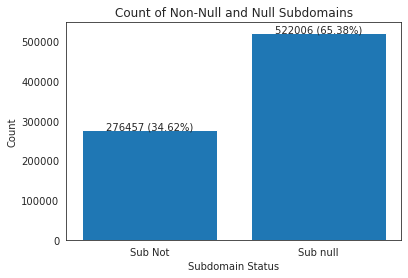

In [145]:
nnc = data['subdomain'].notnull().sum()
nc = data['subdomain'].isna().sum()
tc = len(data)
y = [nnc, nc]
percentages = [(count / tc) * 100 for count in y]
x=['Sub Not','Sub null']
plt.bar(x, y)
plt.xlabel('Subdomain Status')
plt.ylabel('Count')
plt.title('Count of Non-Null and Null Subdomains')
for i in range(len(y)):
    plt.text(x[i], y[i] + 0.5, f'{y[i]} ({percentages[i]:.2f}%)', ha='center')

In [146]:
data.isna().sum(axis=0)

url               0
status            0
domain            0
subdomain    522006
subrep            0
spl               0
tld               0
ptld              0
pcount            0
dtype: int64

In [147]:
m=data[data['status']==0].subdomain.value_counts() 
print(m[m.values>1])

9d345009-a-62cb3a1a-s-sites       1527
mail                              1210
amazon.co.jp                       673
s                                  654
etc.login                          631
                                  ... 
goto-etc-co.pop-jp                   2
ewdsdas                              2
emytgfds                             2
fregsds                              2
support.appleid.apple-feedback       2
Name: subdomain, Length: 12217, dtype: int64


In [148]:
data[data.subdomain=='s']

,url,status,domain,subdomain,subrep,spl,tld,ptld,pcount
22143,s.eaobd.co,0,eaobd,s,7,3,co,1,2
23971,s.oance.co,0,oance,s,7,3,co,1,2
24107,s.onous.co,0,onous,s,7,3,co,1,2
24138,s.ousic.co,0,ousic,s,7,3,co,1,2
29143,http://s.alchemer.com/s3/cza,0,alchemer,s,4,3,com,1,2
...,...,...,...,...,...,...,...,...,...
810130,s.pzu.today,0,pzu,s,7,3,today,1,2
810145,s.qualaroo.com,0,qualaroo,s,7,3,com,1,2
810242,s.sasmbc.com,0,sasmbc,s,7,3,com,1,2
810323,s.surveyanyplace.com,0,surveyanyplace,s,7,3,com,1,2


In [149]:
data[data.url.str.startswith('\'',na=False)].url.str.replace('\'',"")

Series([], Name: url, dtype: object)

In [151]:
l=(data.loc[192064].url)
print(l)
print(subdomain(l))
print(rep(l))

www.gestion-des-impayes.com/visuel.php?param=ik1/i3ekrqjb1kxexsxoekrqjb1kweibjkbvi/ekrqjb1kxesffsekrqjb1kweiqi3bi3ekrqjb1kxerscorxcrekrqjb1kwe3sk/lpby/ekrqjb1kxexekrqjb1kwe1glibjkb vi/ekrqjb1kxesffs
2+gestion-des-impayes.com/visuel.php?param=ik1/i3ekrqjb1kxexsxoekrqjb1kweibjkbvi/ekrqjb1kxesffsekrqjb1kweiqi3bi3ekrqjb1kxerscorxcrekrqjb1kwe3sk/lpby/ekrqjb1kxexekrqjb1kwe1glibjkb vi/ekrqjb1kxesffs
None
5


In [152]:
m=data[data['status']==0].tld.value_counts()
m

com             155498
cn               31429
org              21111
net              15228
top              11990
                 ...  
xn--80asehdb         1
gifu.jp              1
baby                 1
reisen               1
gov.zm               1
Name: tld, Length: 1015, dtype: int64